# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [12]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("/content/cardio.csv", sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

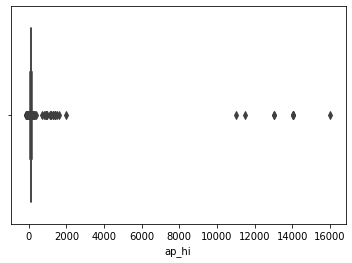

In [8]:
sns.boxplot(x="ap_hi",data=df);

In [9]:
df=df[df['ap_hi']<250]
df=df[df['ap_hi']>0]

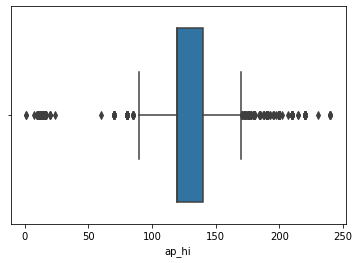

In [10]:
sns.boxplot(x="ap_hi",data=df);

In [19]:
iqr=stats.iqr(df.ap_hi)

In [20]:
np.percentile(df.ap_hi, 75)+1.5*iqr

170.0

In [21]:
np.percentile(df.ap_hi, 75)-1.5*iqr

110.0

In [22]:
df=df[df['ap_hi']<170]
df=df[df['ap_hi']>90]

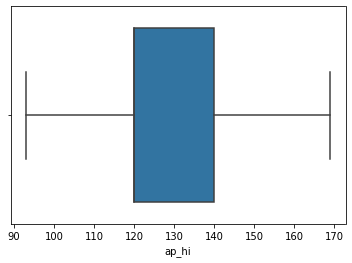

In [23]:
sns.boxplot(x="ap_hi",data=df);

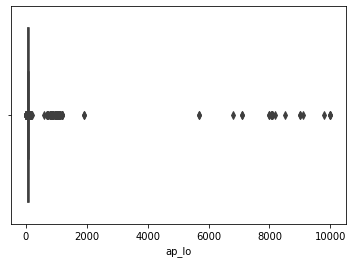

In [24]:
sns.boxplot(x="ap_lo",data=df);

In [25]:
df=df[df['ap_lo']<110]
df=df[df['ap_lo']>60]

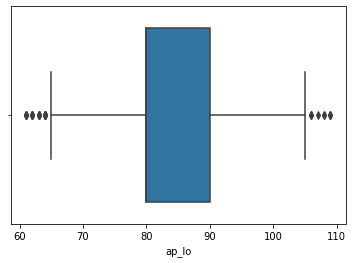

In [26]:
sns.boxplot(x="ap_lo",data=df);

In [27]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000
mean,49979.559451,19488.099508,1.351928,164.466256,74.211244,126.346242,81.714838,1.362315,1.225115,0.087665,0.052934,0.803600,0.495927
std,28857.662001,2457.996448,0.477576,8.144080,14.082985,13.779643,7.639202,0.679101,0.572492,0.282809,0.223904,0.397278,0.499987
min,0.000000,10859.000000,1.000000,55.000000,11.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24942.500000,17713.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50037.000000,19714.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74899.750000,21338.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,169.000000,109.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df=df.sample(n=500)

In [31]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,51297.114000,19532.458000,1.370000,164.822000,74.93720,127.092000,82.192000,1.378000,1.246000,0.092000,0.054000,0.786000,0.508000
std,29447.156399,2502.781532,0.483288,7.959209,13.81115,14.361338,8.091853,0.675298,0.598498,0.289315,0.226244,0.410538,0.500437
min,218.000000,14411.000000,1.000000,145.000000,45.00000,95.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24811.500000,17678.750000,1.000000,160.000000,65.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,52108.500000,19674.500000,1.000000,165.000000,73.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,77467.750000,21643.500000,2.000000,170.000000,83.00000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99991.000000,23589.000000,2.000000,192.000000,135.00000,166.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [32]:
df.ap_hi.mean()

127.092

⭐What is the standard deviation for Systolic blood pressure?

In [33]:
df.ap_hi.std()

14.361338101448911

⭐What is the standard error of the mean for Systolic blood pressure?

In [34]:
df.ap_hi.sem()

0.6422585648539507

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [35]:
df.ap_hi.describe()

count    500.000000
mean     127.092000
std       14.361338
min       95.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      166.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [42]:
stats.t.interval(0.99, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem()) #cevap= hayır değil. Bu güven aralığında 122 i kapsamıyor.

(125.43130067172734, 128.75269932827266)

In [40]:
stats.t.interval(0.95, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem()) 

(125.83013572101788, 128.35386427898212)

In [41]:
stats.t.interval(0.90, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem()) 

(126.03361377185362, 128.15038622814637)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [43]:
#H0: MU=122
#H1: MU =! 122

In [44]:
stats.ttest_1samp(df.ap_hi,122)

Ttest_1sampResult(statistic=7.928271071259154, pvalue=1.4656645481437928e-14)

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [46]:
df.groupby('gender').describe()['ap_hi']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,315.0,126.625397,14.076429,100.0,120.0,120.0,140.0,165.0
2,185.0,127.886486,14.838738,95.0,120.0,120.0,140.0,166.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [48]:
stats.levene(df[df['gender']==1]['ap_hi'],df[df['gender']==2]['ap_hi']) #pvalue 0dan yüksek olduüu için H0 doğru kabul ediyoruz. Zaten std'leri benzer olduğu için tahmin etmiştik.

LeveneResult(statistic=0.07792480970989786, pvalue=0.7802454816512765)

In [49]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.078, p=0.780
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [53]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"],equal_var=True)

Ttest_indResult(statistic=-0.9479011079508056, pvalue=0.34363953600396946)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

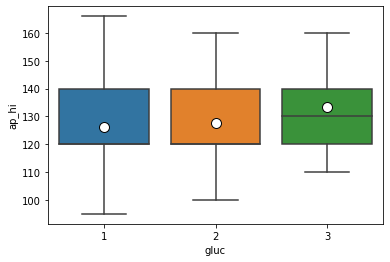

In [60]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True,  meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})

⭐Show the descriptive statistics of 3 groups.

In [57]:
df.groupby('gluc').describe()['ap_hi']

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,420.0,126.397619,13.971040,95.0,120.0,120.0,140.0,166.0
2,37.0,127.621622,17.773812,100.0,120.0,120.0,140.0,160.0
3,43.0,133.418605,13.650802,110.0,120.0,130.0,140.0,160.0


⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [62]:
stats.f_oneway(df[df['gluc']==1]['ap_hi'],
               df[df['gluc']==2]['ap_hi'],           
               df[df['gluc']==3]['ap_hi'])                     

#  H0:all means are equal.
#H1: at least one mean is different. alpha=0.05 eden düşük olduğu için en az biri farklı

F_onewayResult(statistic=4.75917722581483, pvalue=0.008967235138647401)

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [66]:
multicomp= MultiComparison(df['ap_hi'], df['gluc'])

In [68]:
tukey=multicomp.tukeyhsd(alpha=0.05)

In [69]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2    1.224 0.8575 -4.5225  6.9705  False
     1      3    7.021 0.0063  1.6556 12.3864   True
     2      3    5.797 0.1664 -1.7172 13.3111  False
----------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

In [71]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
53346,76118,20524,1,152,59.0,113,75,1,1,0,0,1,0
10616,15164,20544,1,156,60.0,140,80,3,1,0,1,1,1
19055,27210,18959,1,165,78.0,110,80,1,1,0,0,0,0
22981,32836,16073,1,168,57.0,120,80,1,1,0,0,1,0
11504,16456,17530,1,160,113.0,140,90,3,1,0,0,1,1


⭐Create a crosstab using Pandas.

In [70]:
#H0: the two categorical vairables are independent.
#H1 the two categorical vairables are dependent.

In [73]:
ct=pd.crosstab(index = df['active'], columns = df['cardio'])
ct

cardio,0,1
active,,
0,50,57
1,196,197


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [81]:
stats.chi2_contingency(ct)

(0.21868269794986234, 0.6400454746422866, 1, array([[ 52.644,  54.356],
        [193.356, 199.644]]))

In [76]:
chi,p,dof,expected=stats.chi2_contingency(ct)

In [77]:
chi

0.21868269794986234

In [78]:
p

0.6400454746422866

In [79]:
dof

1

In [80]:
expected

array([[ 52.644,  54.356],
       [193.356, 199.644]])

In [83]:
ct1=pd.crosstab(index = df['cholesterol'], columns = df['cardio'])
ct1

cardio,0,1
cholesterol,,
1,207,159
2,28,51
3,11,44


In [84]:
stats.chi2_contingency(ct1)

(32.67164844085954, 8.043437354846734e-08, 2, array([[180.072, 185.928],
        [ 38.868,  40.132],
        [ 27.06 ,  27.94 ]]))